In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import os

#  1.1Read the dataset. Do the descriptive statistics and do null value condition check.

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_excel("Election_Data.xlsx", sheet_name= 'Election_Dataset_Two Classes')


In [119]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [120]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 95.4+ KB


In [122]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [123]:
df.shape

(1525, 9)

In [124]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [125]:
df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [126]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [127]:
df['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [128]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [129]:
dups= df.duplicated()
print(dups.sum())

8


# 1.2Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

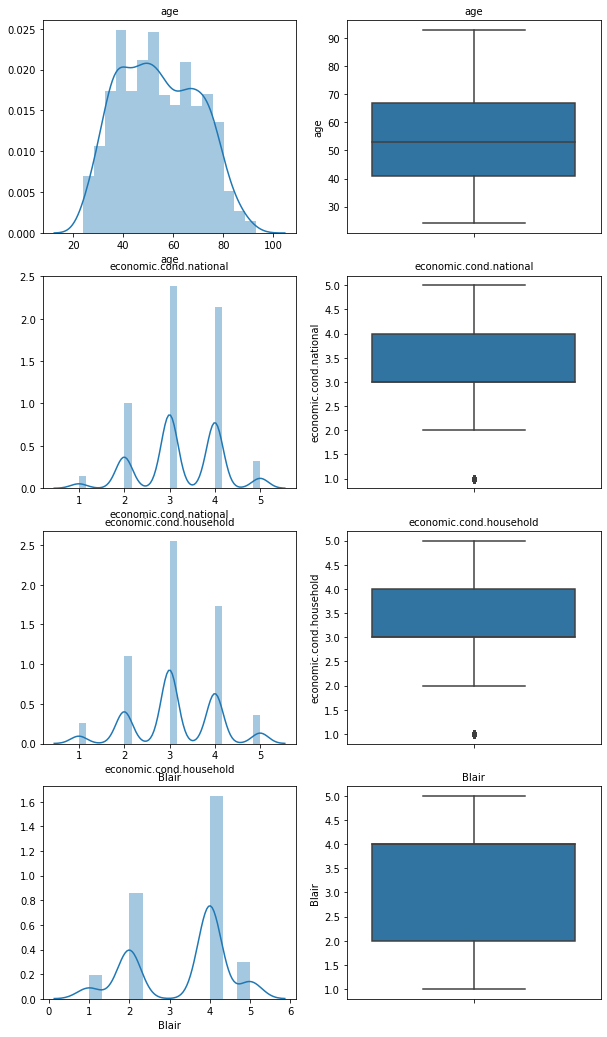

In [130]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national",fontsize=10)

a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household",fontsize=10)

a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair",fontsize=10)


plt.show()

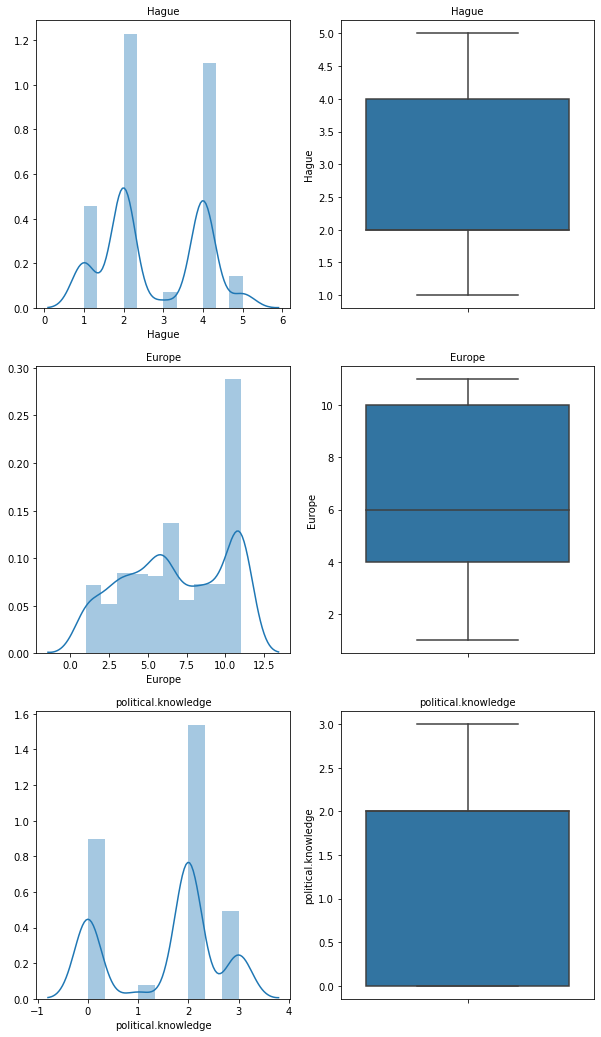

In [131]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)

a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[1][0])
a.set_title("Europe",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[2][0])
a.set_title("political.knowledge",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political.knowledge",fontsize=10)

plt.show()

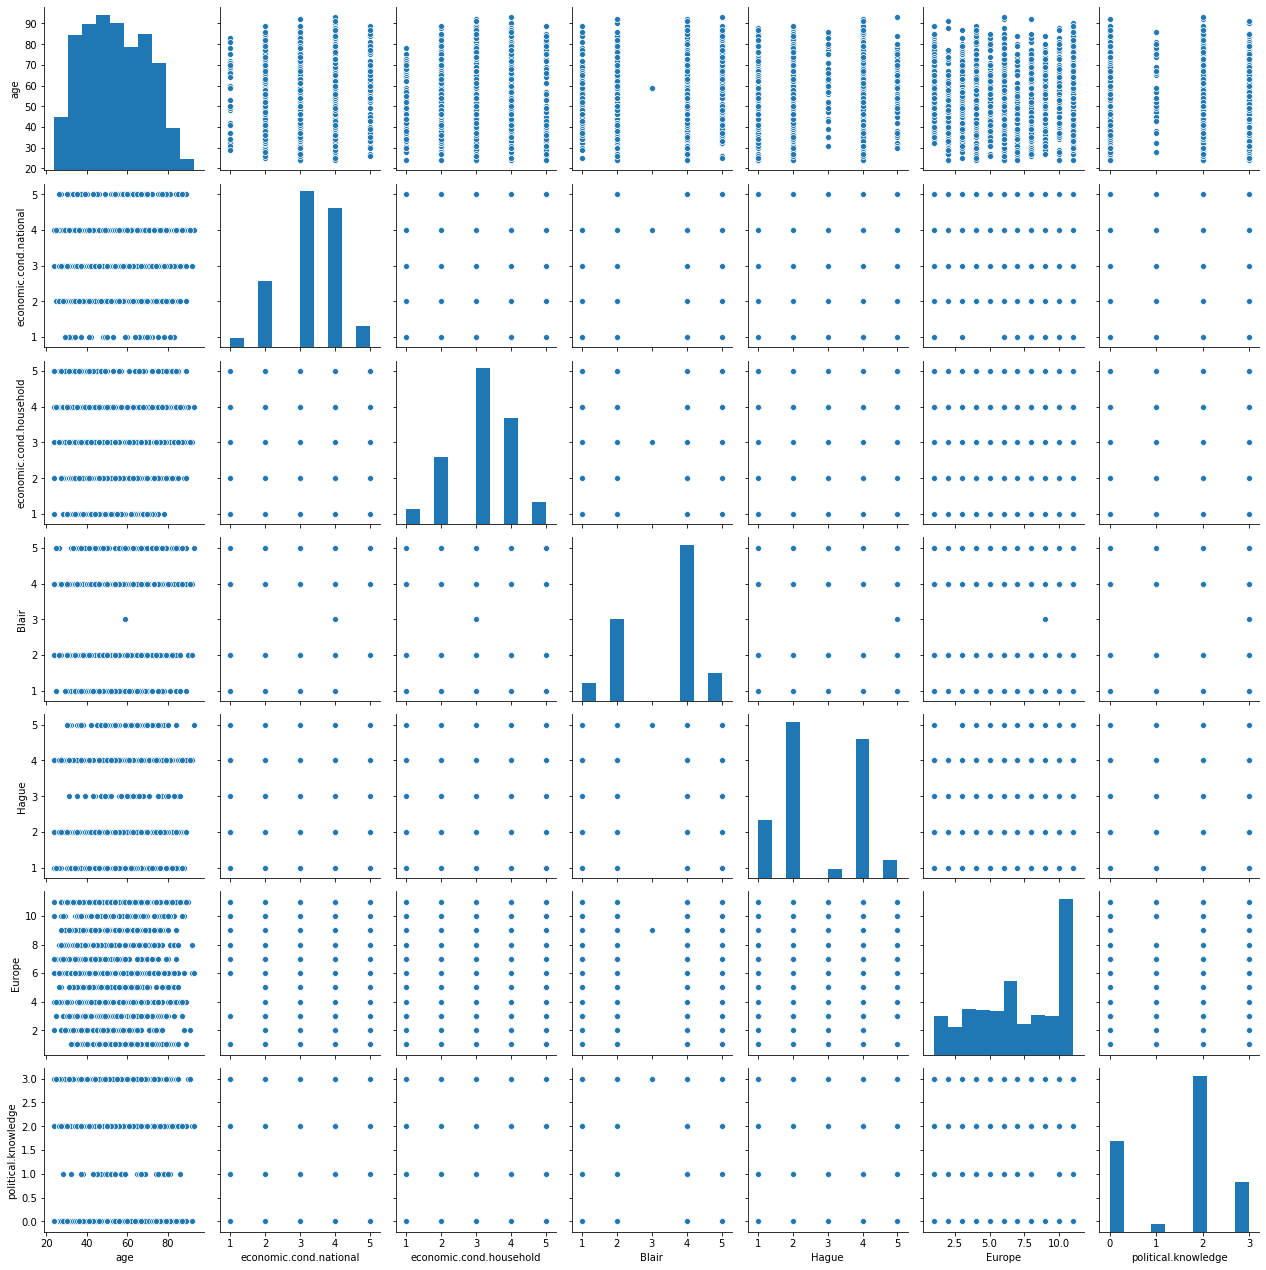

In [132]:
sns.pairplot(df)

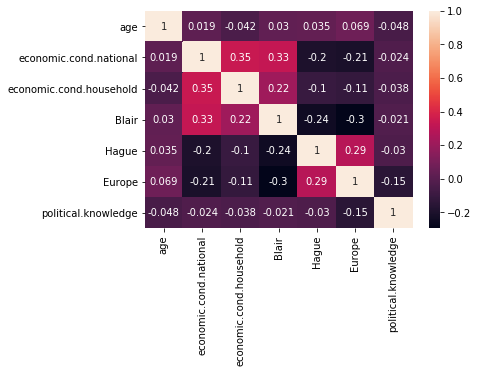

In [133]:
sns.heatmap(df.corr(), annot=True) 

In [134]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [135]:
for column in df.iloc[:, 1:4].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

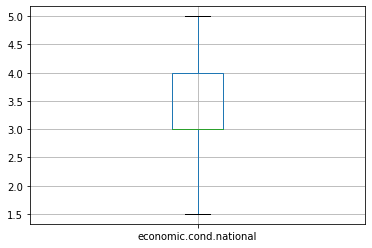

In [136]:
df.boxplot(column=['economic.cond.national'])

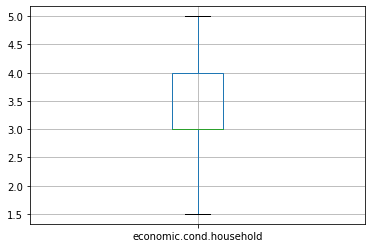

In [137]:
df.boxplot(column=['economic.cond.household'])

# 1.3Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [138]:
vote_new = pd.get_dummies(df["vote"])

In [139]:
vote_new


,Conservative,Labour
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1520,1,0
1521,1,0
1522,0,1
1523,1,0


In [140]:
gender_new = pd.get_dummies(df["gender"])

In [141]:
gender_new 

,female,male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
1520,0,1
1521,0,1
1522,0,1
1523,0,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   object 
 1   age                      1525 non-null   float64
 2   economic.cond.national   1525 non-null   float64
 3   economic.cond.household  1525 non-null   float64
 4   Blair                    1525 non-null   int64  
 5   Hague                    1525 non-null   int64  
 6   Europe                   1525 non-null   int64  
 7   political.knowledge      1525 non-null   int64  
 8   gender                   1525 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 95.4+ KB


In [143]:
df_new = pd.get_dummies(df, prefix= ['gender'], columns=['gender'])
df_new.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_female,gender_male
0,Labour,43.0,3.0,3.0,4,1,2,2,1,0
1,Labour,36.0,4.0,4.0,4,4,5,2,0,1
2,Labour,35.0,4.0,4.0,5,2,3,2,0,1
3,Labour,24.0,4.0,2.0,2,1,4,0,1,0
4,Labour,41.0,2.0,2.0,1,1,6,2,0,1


In [144]:
X = df_new.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df_new['vote']

In [145]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# 1.4 Apply Logistic Regression and LDA (Linear Discriminant Analysis).

# Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.fit(X_test, y_test)

LogisticRegression()

In [147]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.8384279475982532


In [148]:
model.score(X_train, y_train)


0.831302717900656

In [149]:
model.score(X_test, y_test)

0.8384279475982532

In [150]:
y_train_perdict = model.predict(X_train)
y_test_perdict = model.predict(X_test)

In [151]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [152]:
confusion_matrix(y_train, y_train_perdict )

array([[208, 124],
       [ 56, 679]], dtype=int64)

In [153]:
print(classification_report(y_train, y_train_perdict))

              precision    recall  f1-score   support

Conservative       0.79      0.63      0.70       332
      Labour       0.85      0.92      0.88       735

    accuracy                           0.83      1067
   macro avg       0.82      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [154]:
confusion_matrix(y_test, y_test_perdict )

array([[ 83,  47],
       [ 27, 301]], dtype=int64)

In [155]:
print(classification_report(y_test, y_test_perdict))

              precision    recall  f1-score   support

Conservative       0.75      0.64      0.69       130
      Labour       0.86      0.92      0.89       328

    accuracy                           0.84       458
   macro avg       0.81      0.78      0.79       458
weighted avg       0.83      0.84      0.83       458



# LDA (Linear Discriminant Analysis)

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [157]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

Conservative       0.76      0.71      0.73       332
      Labour       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [158]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

Conservative       0.69      0.66      0.67       130
      Labour       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



# 1.5 Apply KNN Model, Naïve Bayes Model and Support Vector Machine (SVM) model.
# 1.6 Model Tuning, Bagging and Boosting.
#  1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

# SVM

In [159]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1)
SVM_model.fit(X_train, y_train)

SVC(random_state=1)

In [160]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.7835051546391752
[[133 199]
 [ 32 703]]
              precision    recall  f1-score   support

Conservative       0.81      0.40      0.54       332
      Labour       0.78      0.96      0.86       735

    accuracy                           0.78      1067
   macro avg       0.79      0.68      0.70      1067
weighted avg       0.79      0.78      0.76      1067



In [161]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7816593886462883
[[ 46  84]
 [ 16 312]]
              precision    recall  f1-score   support

Conservative       0.74      0.35      0.48       130
      Labour       0.79      0.95      0.86       328

    accuracy                           0.78       458
   macro avg       0.76      0.65      0.67       458
weighted avg       0.77      0.78      0.75       458



# Naive Bayes

In [162]:
from sklearn.naive_bayes import GaussianNB


In [163]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [164]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8331771321462043
[[239  93]
 [ 85 650]]
              precision    recall  f1-score   support

Conservative       0.74      0.72      0.73       332
      Labour       0.87      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [165]:
y_test.value_counts()

Labour          328
Conservative    130
Name: vote, dtype: int64

In [166]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 95  35]
 [ 47 281]]
              precision    recall  f1-score   support

Conservative       0.67      0.73      0.70       130
      Labour       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



# Ada Boost

In [167]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [168]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

Conservative       0.78      0.72      0.74       332
      Labour       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [169]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

Conservative       0.68      0.69      0.68       130
      Labour       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



# KNN

In [170]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [171]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.851921274601687
[[236  96]
 [ 62 673]]
              precision    recall  f1-score   support

Conservative       0.79      0.71      0.75       332
      Labour       0.88      0.92      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [172]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7816593886462883
[[ 79  51]
 [ 49 279]]
              precision    recall  f1-score   support

Conservative       0.62      0.61      0.61       130
      Labour       0.85      0.85      0.85       328

    accuracy                           0.78       458
   macro avg       0.73      0.73      0.73       458
weighted avg       0.78      0.78      0.78       458



# Bagging

In [173]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [174]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       332
      Labour       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [175]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7991266375545851
[[ 84  46]
 [ 46 282]]
              precision    recall  f1-score   support

Conservative       0.65      0.65      0.65       130
      Labour       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



# Models with SMOTE

In [176]:
## !pip install smote-variants


In [177]:
!pip install imbalanced-learn

In [178]:
from imblearn.over_sampling import SMOTE

In [179]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [180]:
## Let's check the shape after SMOTE
X_train_res.shape


(1470, 9)

# Naive Bayes with SMOTE

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [182]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [183]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8210884353741497
[[597 138]
 [125 610]]
              precision    recall  f1-score   support

Conservative       0.83      0.81      0.82       735
      Labour       0.82      0.83      0.82       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470



In [184]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7903930131004366
[[104  26]
 [ 70 258]]
              precision    recall  f1-score   support

Conservative       0.60      0.80      0.68       130
      Labour       0.91      0.79      0.84       328

    accuracy                           0.79       458
   macro avg       0.75      0.79      0.76       458
weighted avg       0.82      0.79      0.80       458



# KNN with SMOTE

In [185]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [186]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8816326530612245
[[699  36]
 [138 597]]
              precision    recall  f1-score   support

Conservative       0.84      0.95      0.89       735
      Labour       0.94      0.81      0.87       735

    accuracy                           0.88      1470
   macro avg       0.89      0.88      0.88      1470
weighted avg       0.89      0.88      0.88      1470



In [187]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.74235807860262
[[101  29]
 [ 89 239]]
              precision    recall  f1-score   support

Conservative       0.53      0.78      0.63       130
      Labour       0.89      0.73      0.80       328

    accuracy                           0.74       458
   macro avg       0.71      0.75      0.72       458
weighted avg       0.79      0.74      0.75       458



# SVM with SMOTE

In [188]:
from sklearn import svm

SVM_SM_model= svm.SVC(random_state=1)
SVM_SM_model.fit(X_train_res, y_train_res)

SVC(random_state=1)

In [189]:
## Performance Matrix on train data set
y_train_predict = SVM_SM_model.predict(X_train_res)
model_score = SVM_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.7870748299319728
[[584 151]
 [162 573]]
              precision    recall  f1-score   support

Conservative       0.78      0.79      0.79       735
      Labour       0.79      0.78      0.79       735

    accuracy                           0.79      1470
   macro avg       0.79      0.79      0.79      1470
weighted avg       0.79      0.79      0.79      1470



In [190]:
## Performance Matrix on test data set
y_test_predict = SVM_SM_model.predict(X_test)
model_score = SVM_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7620087336244541
[[106  24]
 [ 85 243]]
              precision    recall  f1-score   support

Conservative       0.55      0.82      0.66       130
      Labour       0.91      0.74      0.82       328

    accuracy                           0.76       458
   macro avg       0.73      0.78      0.74       458
weighted avg       0.81      0.76      0.77       458



# 2.1) Find the number of characters, words and sentences for the mentioned documents

In [237]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

#nltk.download('stopwords')
#nltk.download('punkt')

In [238]:
import nltk

In [239]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\HARSH\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [240]:
from nltk.corpus import inaugural

In [241]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [242]:
speech1 = inaugural.raw('1941-Roosevelt.txt')

In [243]:
speech2 = inaugural.raw('1961-Kennedy.txt')

In [244]:
speech3 = inaugural.raw('1973-Nixon.txt')

In [245]:
text = pd.DataFrame({'text':[speech1,speech2,speech3]})

In [246]:
text.head()

,text
0,On each national day of inauguration since 178...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [247]:
text['word_count'] = text['text'].apply(lambda x: len(str(x).split(" ")))

In [248]:
text[['text','word_count']].head()

,text,word_count
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [249]:
text['char_count'] = text['text'].str.len() ## this also includes spaces
text[['text','char_count']].head()

,text,char_count
0,On each national day of inauguration since 178...,7571
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [250]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

text['avg_word'] = text['text'].apply(lambda x: avg_word(x))
text[['text','avg_word']].head()

,text,avg_word
0,On each national day of inauguration since 178...,4.539706
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.461871
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.465091


In [ ]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words))

text['avg_word'] = text['text'].apply(lambda x: avg_word(x))
text[['text','avg_word']].head()

# 2.2) Remove all the stopwords from the three speeches.

In [251]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [252]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

text['stopwords'] = text['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
text[['text','stopwords']].head()

,text,stopwords
0,On each national day of inauguration since 178...,632
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


In [253]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text['text'].head()

0    On national day inauguration since 1789, peopl...
1    Vice President Johnson, Mr. Speaker, Mr. Chief...
2    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: text, dtype: object

# 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [254]:
freq = pd.Series(' '.join(text['text']).split()).value_counts()[:10]
freq

--         63
us         44
new        25
We         22
Let        21
let        18
I          18
America    15
The        15
It         14
dtype: int64

# 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [255]:
##!pip install wordcloud

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(speech1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
